In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import tensorflow as tf

In [120]:
from PIL import Image
path='C:\Abdul Sameer\ICG_CycleGANS\data\Training\Early_Blight'
all_files=os.listdir(path)
jpg=[f for f in all_files if f.lower().endswith('.jpg')]
train_images=[]
train_labels=[]
ts=(128,128)
for file in jpg:
    imgp=os.path.join(path,file)
    image=Image.open(imgp)
    image=image.resize(ts)
    img_arr=np.array(image)/255.0
    train_images.append(img_arr)
    train_labels.append(0)


In [121]:
path='C:\Abdul Sameer\ICG_CycleGANS\data\Training\Healthy'
all_files2=os.listdir(path)
jpg=[f for f in all_files2 if f.lower().endswith('.jpg')]
for file in jpg:
    imgp=os.path.join(path,file)
    image=Image.open(imgp)
    image=image.resize(ts)
    img_arr=np.array(image)/255.0
    train_images.append(img_arr)
    train_labels.append(1)


In [122]:
path='C:\Abdul Sameer\ICG_CycleGANS\data\Training\Late_Blight'
all_files3=os.listdir(path)
jpg=[f for f in all_files3 if f.lower().endswith('.jpg')]
for file in jpg:
    imgp=os.path.join(path,file)
    image=Image.open(imgp)
    image=image.resize(ts)
    img_arr=np.array(image)/255.0
    train_images.append(img_arr)
    train_labels.append(2)

In [123]:
from PIL import Image
path='C:\Abdul Sameer\ICG_CycleGANS\data\Testing\Early_Blight'
all_files=os.listdir(path)
jpg=[f for f in all_files if f.lower().endswith('.jpg')]
test_images=[]
test_labels=[]
ts=(128,128)
for file in jpg:
    imgp=os.path.join(path,file)
    image=Image.open(imgp)
    image=image.resize(ts)
    img_arr=np.array(image)/255.0
    test_images.append(img_arr)
    test_labels.append(0)


In [124]:
from PIL import Image
path='C:\Abdul Sameer\ICG_CycleGANS\data\Testing\Healthy'
all_files=os.listdir(path)
jpg=[f for f in all_files if f.lower().endswith('.jpg')]
for file in jpg:
    imgp=os.path.join(path,file)
    image=Image.open(imgp)
    image=image.resize(ts)
    img_arr=np.array(image)/255.0
    test_images.append(img_arr)
    test_labels.append(1)

In [125]:
from PIL import Image
path='C:\Abdul Sameer\ICG_CycleGANS\data\Testing\Late_Blight'
all_files=os.listdir(path)
jpg=[f for f in all_files if f.lower().endswith('.jpg')]
for file in jpg:
    imgp=os.path.join(path,file)
    image=Image.open(imgp)
    image=image.resize(ts)
    img_arr=np.array(image)/255.0
    test_images.append(img_arr)
    test_labels.append(2)

In [126]:
train_labels=np.array(train_labels)
print(train_labels.shape)
train_images=np.array(train_images)
print(train_images.shape)
test_labels=np.array(test_labels)
print(test_labels.shape)
test_images=np.array(test_images)
print(test_images.shape)

(3251,)
(3251, 128, 128, 3)
(405,)
(405, 128, 128, 3)


In [127]:
from tensorflow.keras.models import Sequential
model=Sequential()

In [128]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.summary()

c:\Users\shaik\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [130]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [131]:
print(train_labels)

[0 0 0 ... 2 2 2]


In [132]:
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10


c:\Users\shaik\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


102/102 ━━━━━━━━━━━━━━━━━━━━ 35s 308ms/step - accuracy: 0.4490 - loss: 1.0910 - val_accuracy: 0.6914 - val_loss: 0.7321
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 289ms/step - accuracy: 0.7031 - loss: 0.6930 - val_accuracy: 0.7728 - val_loss: 0.5704
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 31s 307ms/step - accuracy: 0.8049 - loss: 0.5063 - val_accuracy: 0.8543 - val_loss: 0.4147
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 296ms/step - accuracy: 0.8868 - loss: 0.3300 - val_accuracy: 0.8469 - val_loss: 0.4568
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 31s 303ms/step - accuracy: 0.8776 - loss: 0.3349 - val_accuracy: 0.8914 - val_loss: 0.3135
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 33s 324ms/step - accuracy: 0.9192 - loss: 0.2332 - val_accuracy: 0.9062 - val_loss: 0.3154
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 298ms/step - accuracy: 0.9223 - loss: 0.2292 - val_accuracy: 0.9407 - val_loss: 0.1878
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 32s 314ms/step - accuracy: 0.9604 - loss: 0.1239 - val

13/13 - 1s - 83ms/step - accuracy: 0.9284 - loss: 0.2025


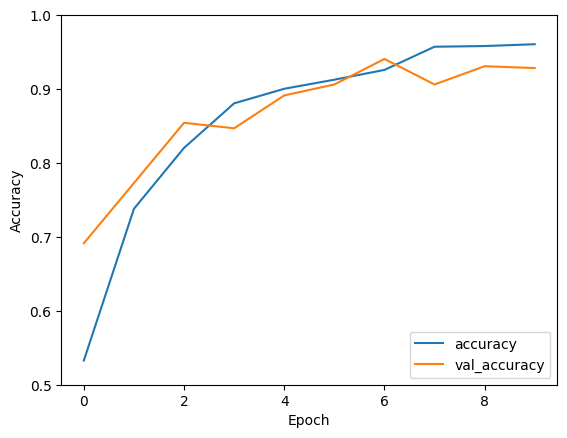

In [133]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [134]:
from sklearn.metrics import classification_report
y_predict=model.predict(test_images)
y_predict = np.argmax(y_predict, axis=-1) 
class_names=['Early_Blight','Healthy','Late_Blight']
print(classification_report(test_labels, y_predict, target_names=class_names))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
              precision    recall  f1-score   support

Early_Blight       0.92      0.93      0.92       162
     Healthy       0.91      0.89      0.90       102
 Late_Blight       0.96      0.95      0.95       141

    accuracy                           0.93       405
   macro avg       0.93      0.92      0.93       405
weighted avg       0.93      0.93      0.93       405



In [135]:
from sklearn.metrics import f1_score

print(f1_score(test_labels, y_predict, average='weighted'))


0.9283766353715915
